<a href="https://colab.research.google.com/github/roshank1605A04/Cervical-Cancer-Prediction/blob/master/CevicalCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**Importing the Dataset**

In [2]:
data = pd.read_csv("C:/Users/gk143/OneDrive/Desktop/kag_risk_factors_cervical_cancer.csv")

print(data.shape)

data.head()

(858, 36)


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [4]:
data.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# determining the null values in each column

# Assuming 'data' is your DataFrame
data.replace("?", np.nan, inplace=True)

# Convert columns to numeric
data = data.apply(pd.to_numeric)

# Check for null values in each column
print(data.isnull().sum())


Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [6]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [7]:
# 0 means not cancer affected and 1 means cancer affected cell

data['Biopsy'].value_counts()

Biopsy
0    803
1     55
Name: count, dtype: int64

In [8]:
# various number of sexual partners in the given dataset

data['Number of sexual partners'].value_counts()

Number of sexual partners
2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: count, dtype: int64

** Correlation Plot**

<Axes: >

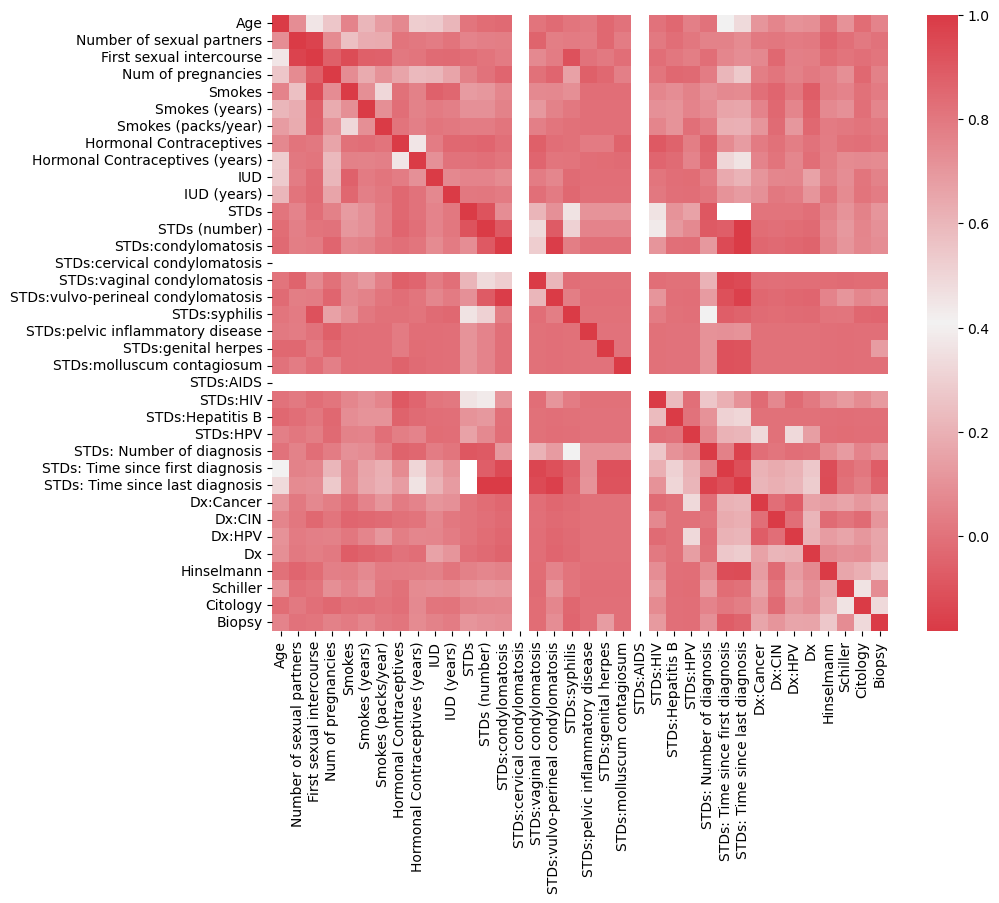

In [9]:
# correlation plot

# Assuming 'data' is your DataFrame
f, ax = plt.subplots(figsize=(10, 8))

corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
            cmap=sns.diverging_palette(10, 10, as_cmap=True), square=True, ax=ax)

C:\Users\gk143\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\gk143\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\gk143\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\gk143\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

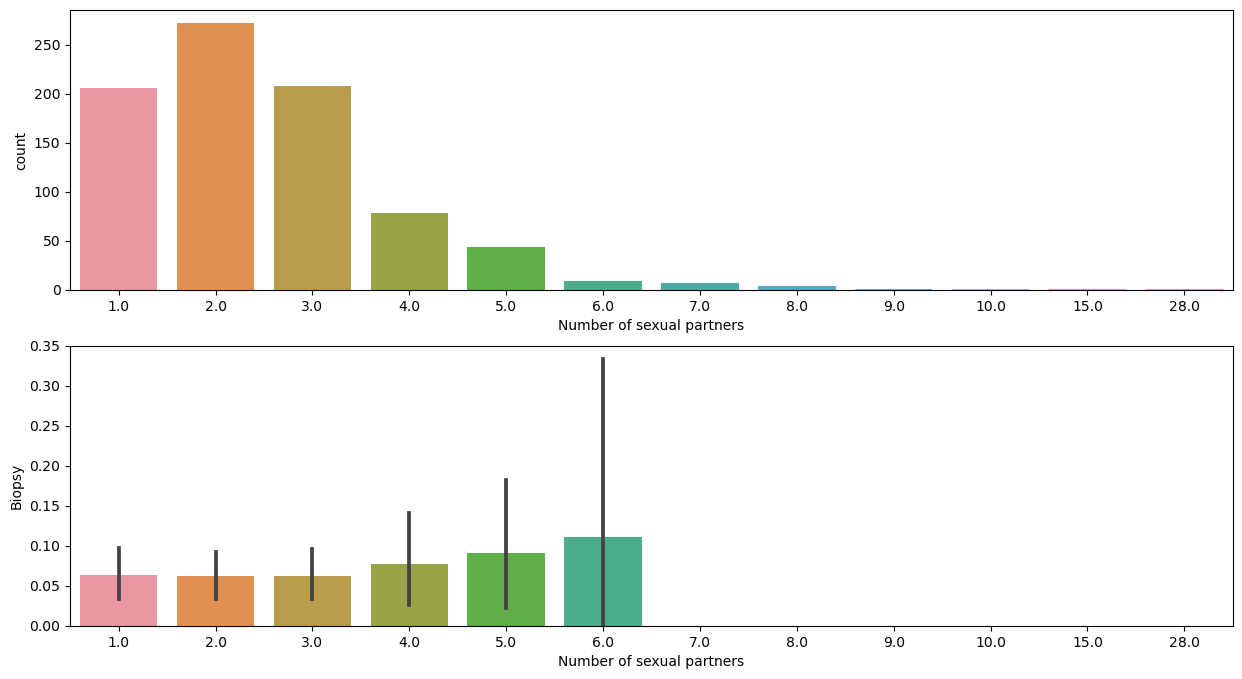

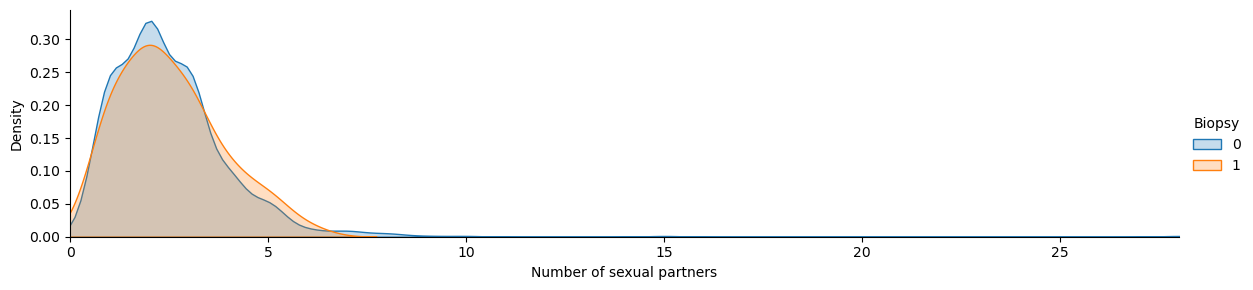

In [10]:
# Biopsy vs no. of sexual partners

#categorical to categorical
fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (15, 8))
sns.countplot(x = 'Number of sexual partners', data = data, ax=ax1)
sns.barplot(x = 'Number of sexual partners', y = 'Biopsy', data = data, ax=ax2) 

#continuous to categorical
facet = sns.FacetGrid(data, hue='Biopsy',aspect=4)
facet.map(sns.kdeplot,'Number of sexual partners',shade= True)
facet.set(xlim=(0, data['Number of sexual partners'].max()))
facet.add_legend()

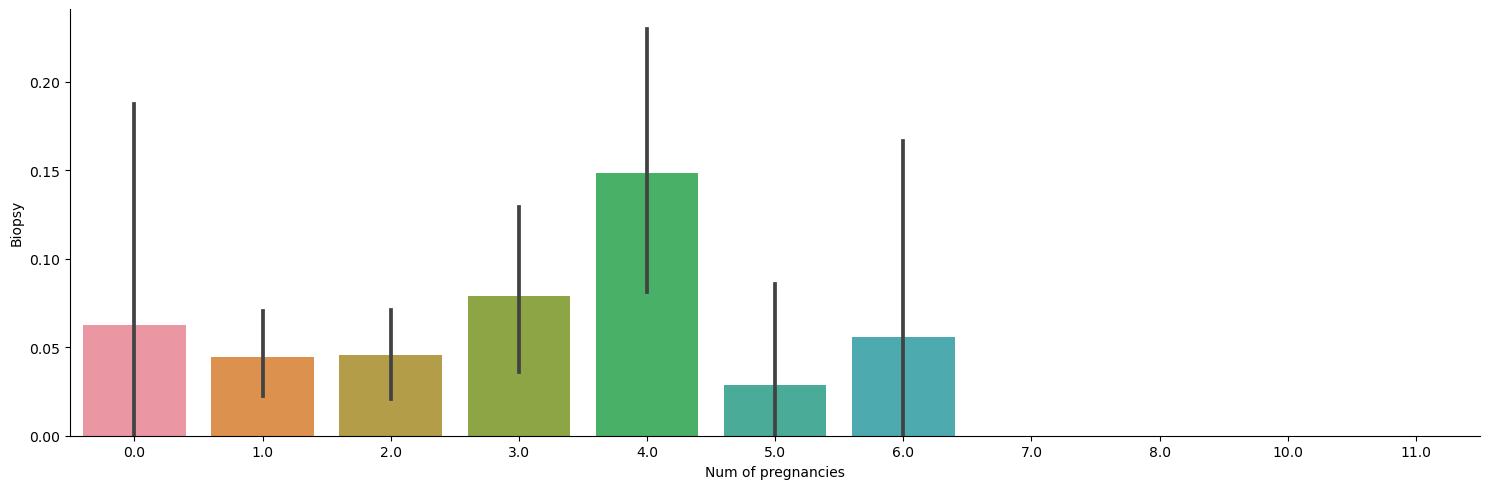

In [11]:
# biopsy vs no. of pregnancies


sns.catplot(x='Num of pregnancies', y='Biopsy', data=data, kind='bar', height=5, aspect=3)


<Axes: xlabel='Schiller', ylabel='Biopsy'>

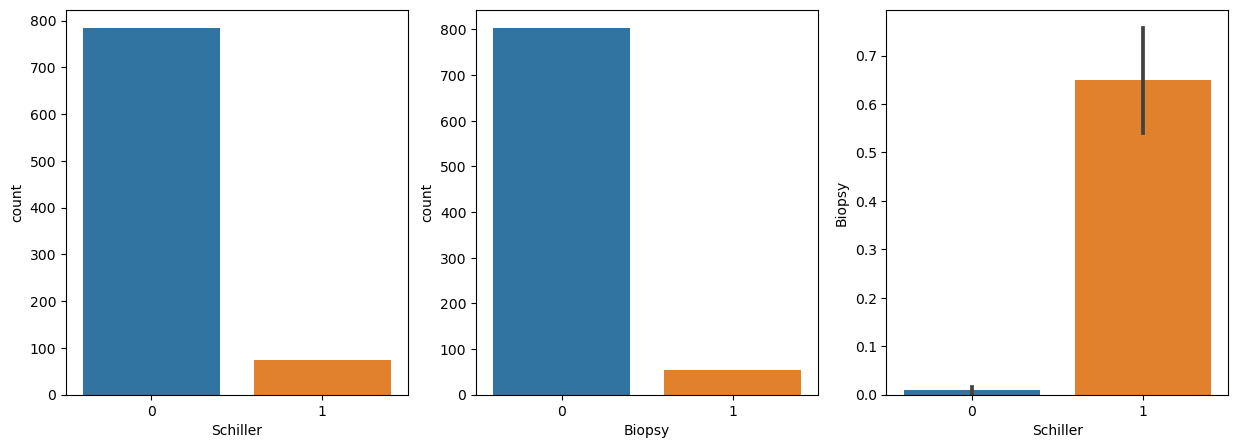

In [12]:
#continuous to categorical
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='Schiller', data=data, ax=axis1)
sns.countplot(x='Biopsy', data=data, ax=axis2)
sns.barplot(x='Schiller', y='Biopsy', data=data, ax=axis3)

<Axes: xlabel='Citology', ylabel='Biopsy'>

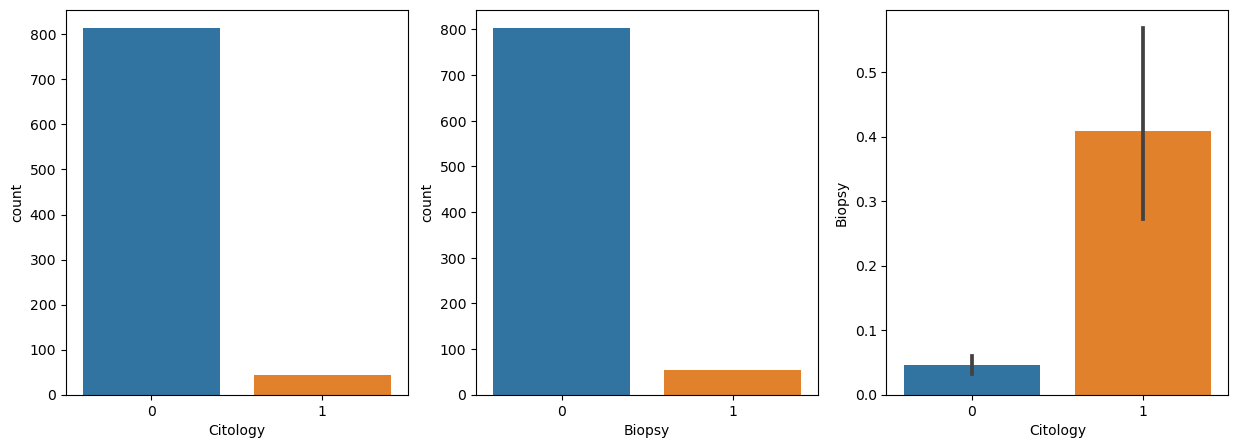

In [13]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='Citology', data=data, ax=axis1)
sns.countplot(x='Biopsy', data=data, ax=axis2)
sns.barplot(x='Citology', y='Biopsy', data=data, ax=axis3)

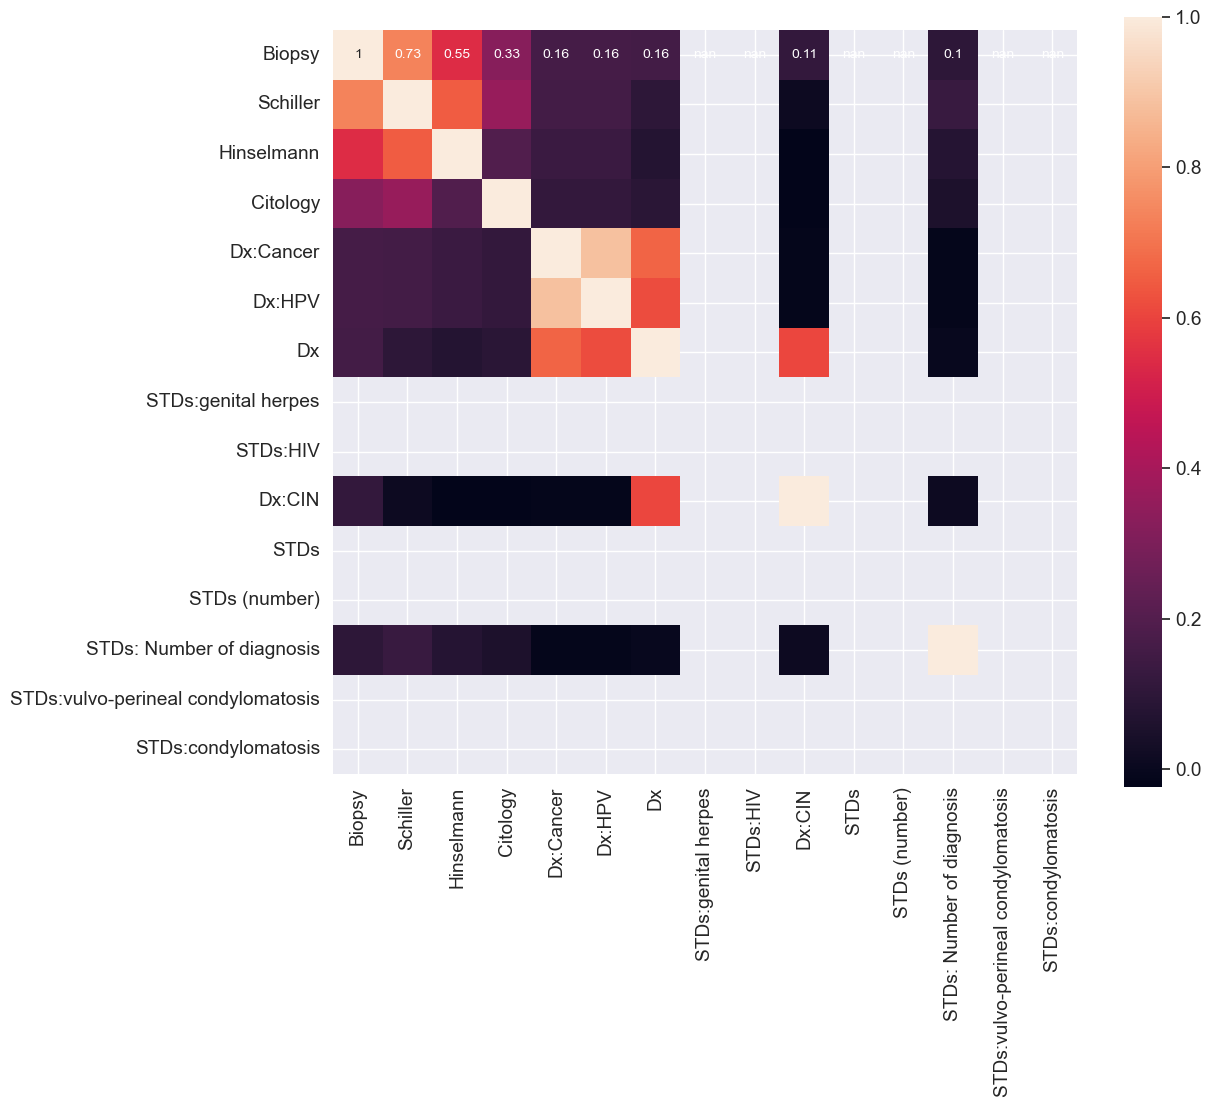

In [14]:
corr = data.corr()

# number of variables for heatmap
k = 15

cols = corr.nlargest(k, 'Biopsy')['Biopsy'].index
cm = np.corrcoef(data[cols].values.T)

plt.figure(figsize=(12, 10))

sns.set(font_scale=1.25)
annot = np.round(cm, 2)  # Round the correlation coefficients to two decimal places
sns.heatmap(cm, cbar=True, annot=annot, square=True, annot_kws={'size': 10},
            yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**Data Preprocessing**

In [15]:
# Imputing the missing values from the given dataset
# we will impute the categorical variables with 0 or 1 and continuous variables with median value

data['Number of sexual partners'] = data['Number of sexual partners'].fillna(data['Number of sexual partners'].median())
data['Number of sexual partners'].isnull().any()

# data['Number of sexual partners'].value_counts()

False

In [16]:
# Imputing the missing values from First sexual intercourse

data['First sexual intercourse'] = data['First sexual intercourse'].fillna(data['First sexual intercourse'].median())
data['First sexual intercourse'].isnull().any()

# data['First sexual intercourse'].value_counts()

False

In [17]:
# Imputing the missing values from Num of pregnancies

data['Num of pregnancies'] = data['Num of pregnancies'].fillna(data['Num of pregnancies'].median())
data['Num of pregnancies'].isnull().any()

# data['Num of pregnancies'].value_counts()

False

In [18]:
# Imputing the missing values from Smokes

data['Smokes'] = data['Smokes'].fillna(data['Smokes'].median())
data['Smokes'].isnull().any()

# data['Smokes'].value_counts()

False

In [19]:
# Imputing the missing values from Smokes (years)

data['Smokes (years)'] = data['Smokes (years)'].fillna(1)
data['Smokes (years)'].isnull().any()

# data['Smokes (years)'].value_counts()

False

In [20]:
# Imputing the missing values from Smokes (packs/year)

data['Smokes (packs/year)'] = data['Smokes (packs/year)'].fillna(data['Smokes (packs/year)'].median())
data['Smokes (packs/year)'].isnull().any()

# data['Smokes (packs/year)'].value_counts()

False

In [21]:
# Imputing the missing values from Hormonal Contraceptives

data['Hormonal Contraceptives'] = data['Hormonal Contraceptives'].fillna(data['Hormonal Contraceptives'].median())
data['Hormonal Contraceptives'].isnull().any()

# data['Hormonal Contraceptives'].value_counts()

False

In [22]:
# Imputing the missing values from Hormonal Contraceptives (years)

data['Hormonal Contraceptives (years)'] = data['Hormonal Contraceptives (years)'].fillna(data['Hormonal Contraceptives (years)'].median())
data['Hormonal Contraceptives (years)'].isnull().any()

# data['Hormonal Contraceptives (years)'].value_counts()

False

In [23]:
# Imputing the missing values from IUD

data['IUD'] = data['IUD'].fillna(0)
data['IUD'].isnull().any()

# data['IUD'].value_counts()

False

In [24]:
# Imputing the missing values from IUD (years)

data['IUD (years)'] = data['IUD (years)'].fillna(0)
data['IUD (years)'].isnull().any()

# data['IUD (years)'].value_counts()

False

In [25]:
# Imputing the missing values from STDs

data['STDs'] = data['STDs'].fillna(1)
data['STDs'].isnull().any()

# data['STDs'].value_counts()

False

In [26]:
# Imputing the missing values from STDs (number)

data['STDs (number)'] = data['STDs (number)'].fillna(data['STDs (number)'].median())
data['STDs (number)'].isnull().any()

# data['STDs (number)'].value_counts()

False

In [27]:
# Imputing the missing values from STDs:condylomatosis

data['STDs:condylomatosis'] = data['STDs:condylomatosis'].fillna(data['STDs:condylomatosis'].median())
data['STDs:condylomatosis'].isnull().any()

# data['STDs:condylomatosis'].value_counts()

False

In [28]:
# Imputing the missing values from STDs:cervical condylomatosis

data['STDs:cervical condylomatosis'] = data['STDs:cervical condylomatosis'].fillna(data['STDs:cervical condylomatosis'].median())
data['STDs:cervical condylomatosis'].isnull().any()

# data['STDs:cervical condylomatosis'].value_counts()

False

In [29]:
# Imputing the missing values from STDs:vaginal condylomatosis

data['STDs:vaginal condylomatosis'] = data['STDs:vaginal condylomatosis'].fillna(data['STDs:vaginal condylomatosis'].median())
data['STDs:vaginal condylomatosis'].isnull().any()

# data['STDs:vaginal condylomatosis'].value_counts()

False

In [30]:
# Imputing the missing values from STDs:vulvo-perineal condylomatosis

data['STDs:vulvo-perineal condylomatosis'] = data['STDs:vulvo-perineal condylomatosis'].fillna(data['STDs:vulvo-perineal condylomatosis'].median())
data['STDs:vulvo-perineal condylomatosis'].isnull().any()

# data['STDs:vulvo-perineal condylomatosis'].value_counts()

False

In [31]:
# Imputing the missing values from STDs:syphilis

data['STDs:syphilis'] = data['STDs:syphilis'].fillna(data['STDs:syphilis'].median())
data['STDs:syphilis'].isnull().any()

# data['STDs:syphilis'].value_counts()

False

In [32]:
# Imputing the missing values from STDs:pelvic inflammatory diseases

data['STDs:pelvic inflammatory disease'] = data['STDs:pelvic inflammatory disease'].fillna(data['STDs:pelvic inflammatory disease'].median())
data['STDs:pelvic inflammatory disease'].isnull().any()

# data['STDs:pelvic inflammatory disease'].value_counts()

False

In [33]:
# Imputing the missing values from STDs:genital herpes

data['STDs:genital herpes'] = data['STDs:genital herpes'].fillna(data['STDs:genital herpes'].median())
data['STDs:genital herpes'].isnull().any()

# data['STDs:genital herpes'].value_counts()

False

In [34]:
# Imputing the missing values from STDs:molluscum contagiosum

data['STDs:molluscum contagiosum'] = data['STDs:molluscum contagiosum'].fillna(data['STDs:molluscum contagiosum'].median())
data['STDs:molluscum contagiosum'].isnull().any()

# data['STDs:molluscum contagiosum'].value_counts()

False

In [35]:
# Imputing the missing values from STDs:AIDS

data['STDs:AIDS'] = data['STDs:AIDS'].fillna(data['STDs:AIDS'].median())
data['STDs:AIDS'].isnull().any()

# data['STDs:AIDS'].value_counts()

False

In [36]:
# Imputing the missing values from STDs:HIV

data['STDs:HIV'] = data['STDs:HIV'].fillna(data['STDs:HIV'].median())
data['STDs:HIV'].isnull().any()

# data['STDs:HIV'].value_counts()

False

In [37]:
# Imputing the missing values from STDs:Hepatitis B

data['STDs:Hepatitis B'] = data['STDs:Hepatitis B'].fillna(data['STDs:Hepatitis B'].median())
data['STDs:Hepatitis B'].isnull().any()

# data['STDs:Hepatitis B'].value_counts()

False

In [38]:
# Imputing the missing values from STDs:HPV

data['STDs:HPV'] = data['STDs:HPV'].fillna(data['STDs:HPV'].median())
data['STDs:HPV'].isnull().any()

# data['STDs:HPV'].value_counts()

False

In [39]:
# Imputing the missing values from STDs: Time since first diagnosis

data['STDs: Time since first diagnosis'] = data['STDs: Time since first diagnosis'].fillna(data['STDs: Time since first diagnosis'].median())
data['STDs: Time since first diagnosis'].isnull().any()

# data['STDs: Time since first diagnosis'].value_counts()

False

In [40]:
# Imputing the missing values from STDs: Time since last diagnosis

data['STDs: Time since last diagnosis'] = data['STDs: Time since last diagnosis'].fillna(data['STDs: Time since last diagnosis'].median())
data['STDs: Time since last diagnosis'].isnull().any()
 
# data['STDs: Time since last diagnosis'].value_counts()

False

In [41]:
# Imputing values for categorical variables

data = pd.get_dummies(data = data, columns = ['Smokes','Hormonal Contraceptives','IUD','STDs',
                                      'Dx:Cancer','Dx:CIN','Dx:HPV','Dx','Hinselmann','Citology','Schiller'])

data.isnull().sum()

Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives (years)       0
IUD (years)                           0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0
STDs: Number of diagnosis             0
STDs: Time since first diagnosis      0
STDs: Time since last diagnosis       0
Biopsy                                0


In [42]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes (years),Smokes (packs/year),Hormonal Contraceptives (years),IUD (years),STDs (number),STDs:condylomatosis,...,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,...,858.000000,858.000000,858.0,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,2.511655,16.995338,2.257576,1.216392,0.446278,2.035331,0.444604,0.155012,0.051282,...,0.001166,0.001166,0.0,0.020979,0.001166,0.002331,0.087413,4.177156,3.233100,0.064103
std,8.497948,1.644759,2.791883,1.400981,4.057974,2.210351,3.567040,1.814218,0.529617,0.220701,...,0.034139,0.034139,0.0,0.143398,0.034139,0.048252,0.302545,1.785156,1.818927,0.245078
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,20.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000
75%,32.000000,3.000000,18.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,37.000000,37.000000,30.000000,19.000000,4.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,22.000000,22.000000,1.000000


**Data Visualization**

<Axes: xlabel='STDs (number)', ylabel='count'>

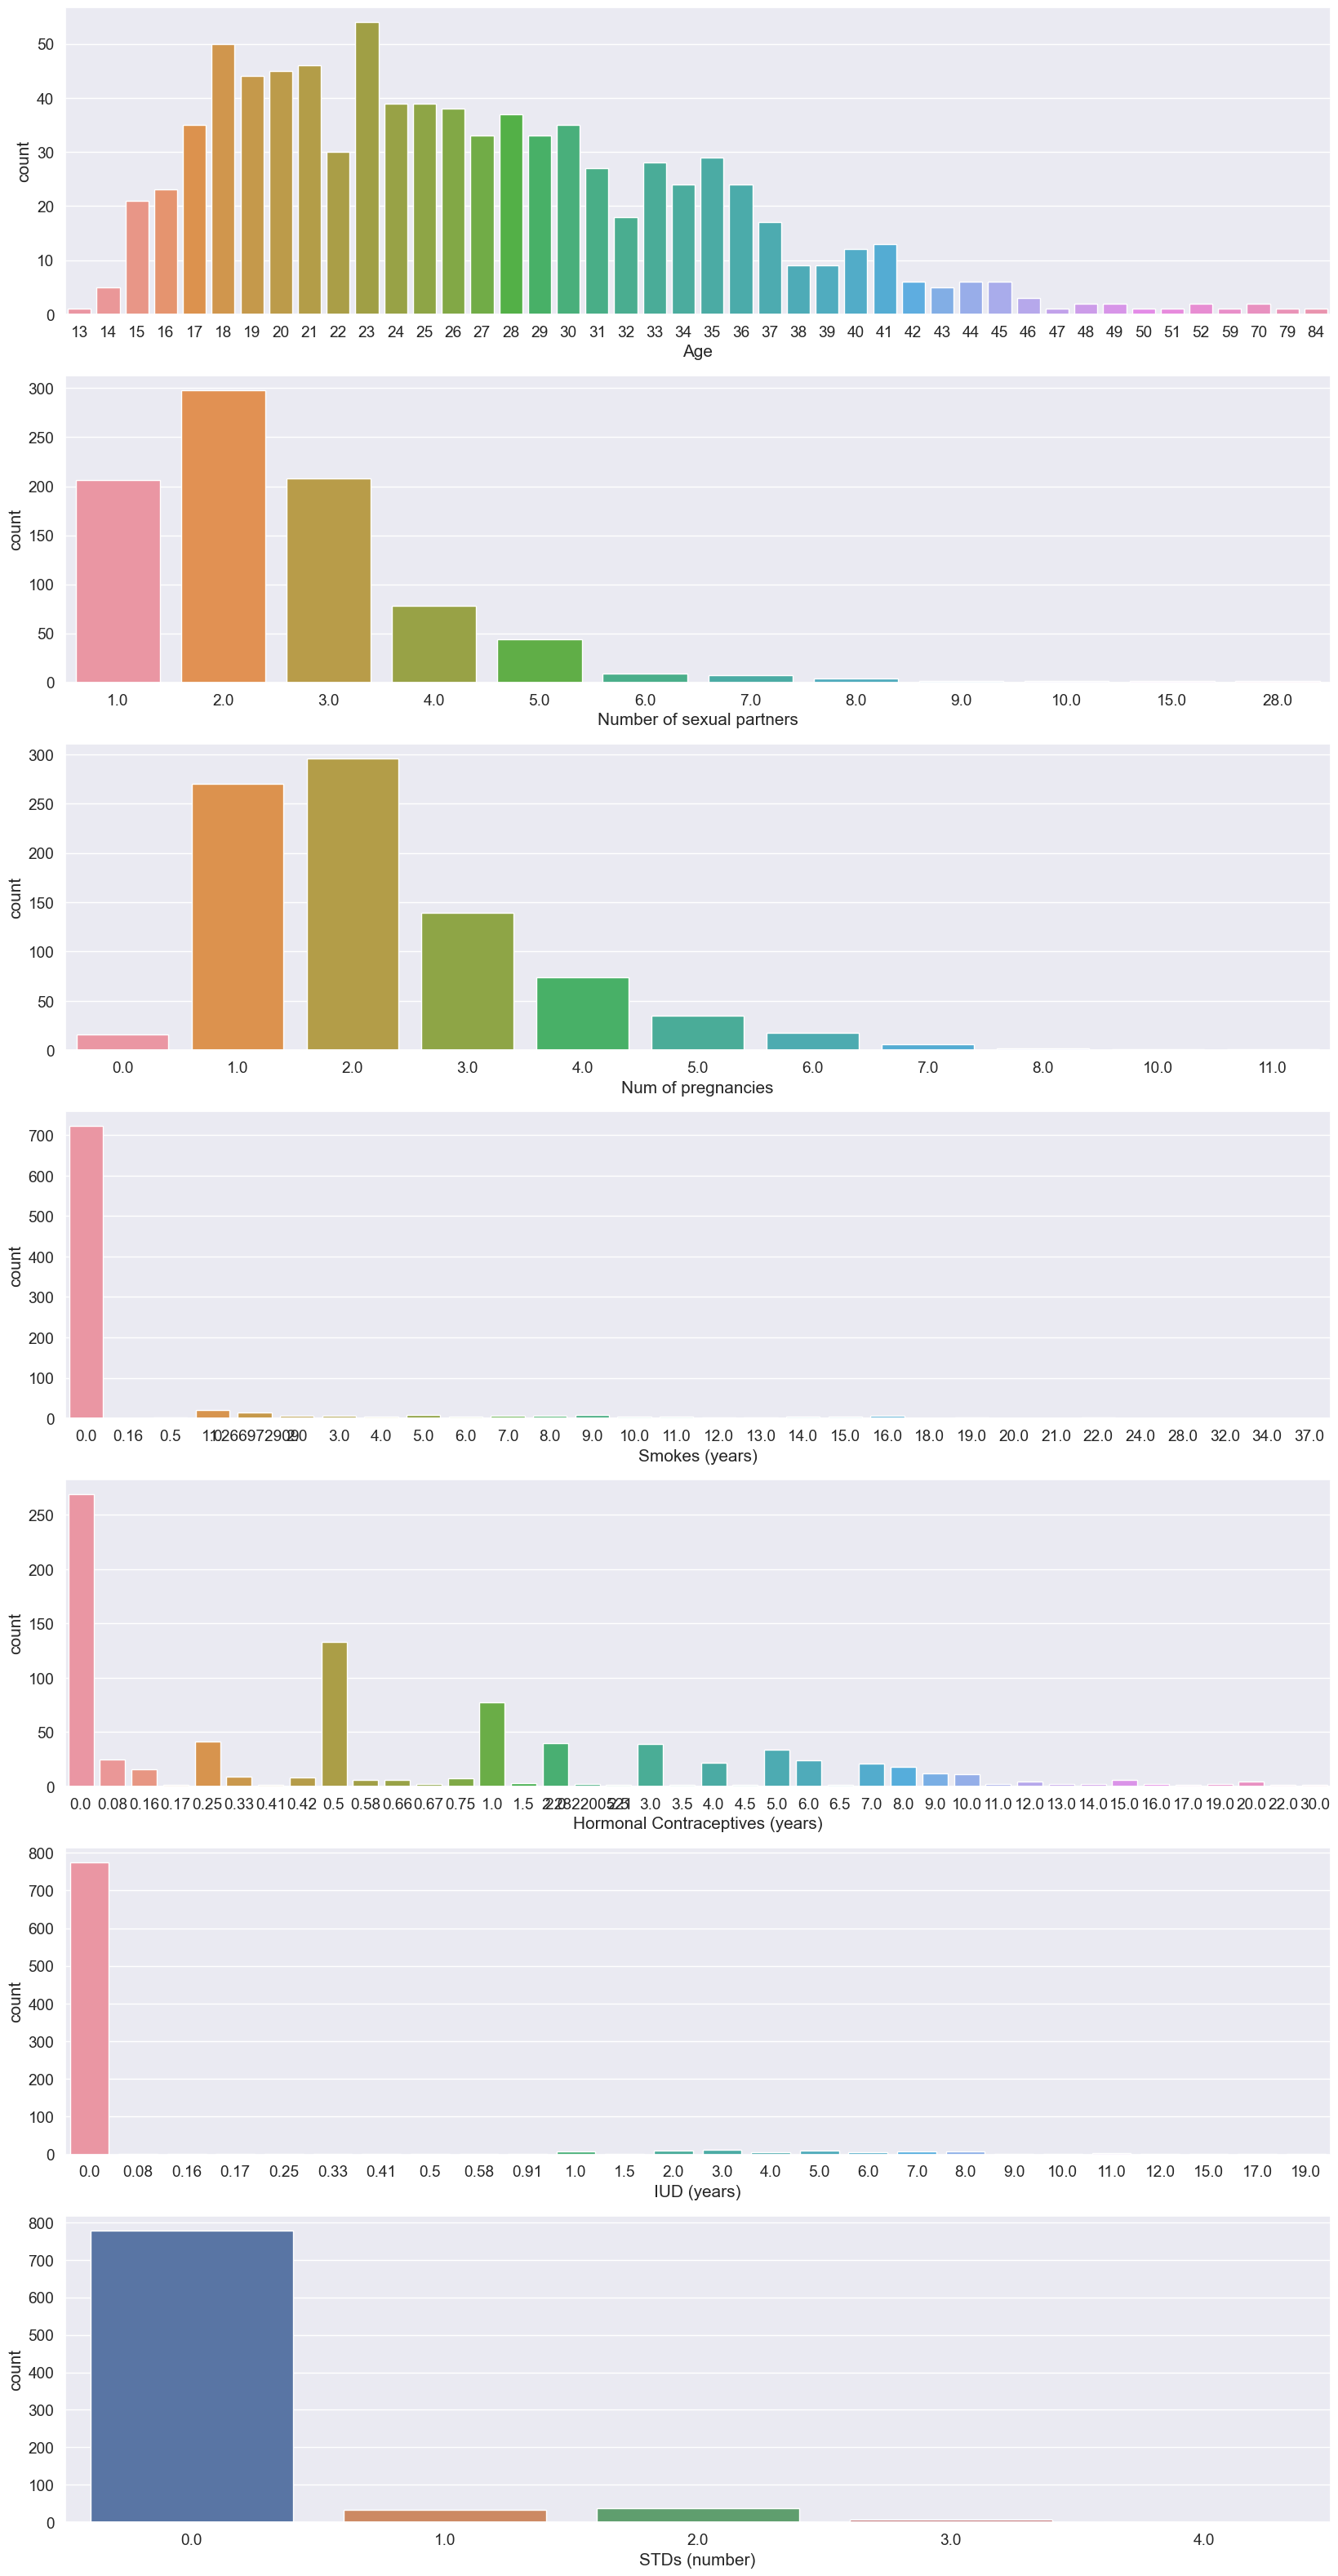

In [43]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7, 1, figsize = (20,40))
sns.countplot(x='Age', data=data, ax=ax1)
sns.countplot(x='Number of sexual partners', data=data, ax=ax2)
sns.countplot(x='Num of pregnancies', data=data, ax=ax3)
sns.countplot(x='Smokes (years)', data=data, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=data, ax=ax5)
sns.countplot(x='IUD (years)', data=data, ax=ax6)
sns.countplot(x='STDs (number)', data=data, ax=ax7)

In [44]:
# splitting the dataset into dependent and independent variables

x = data.iloc[:,:46]
y = data.iloc[:,46]

print(x.shape)
print(y.shape)


(858, 46)
(858,)


In [45]:
# splitting the dataset into  training and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(514, 46)
(514,)
(344, 46)
(344,)


In [46]:
# MinMaxScaling

from sklearn.preprocessing import MinMaxScaler

# creating a minmax scaler
mm = MinMaxScaler()

# feeding the independent data into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.fit_transform(x_test)

**Modelling**

**Logistic Regression**

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# creating the model
model = LogisticRegression()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       312
        True       1.00      1.00      1.00        32

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344

[[312   0]
 [  0  32]]


**Support Vector Machine**

In [48]:
from sklearn.svm import SVC

# creating the model
model = SVC()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))


Training accuracy : 1.0
Testing accuracy : 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       312
        True       1.00      1.00      1.00        32

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344

[[312   0]
 [  0  32]]


**Random Forest**

In [49]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model = RandomForestClassifier()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       312
        True       1.00      1.00      1.00        32

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344

[[312   0]
 [  0  32]]


**Decision Tree**

In [50]:
from sklearn.tree import DecisionTreeClassifier

# creating the model
model = DecisionTreeClassifier()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))


Training accuracy : 1.0
Testing accuracy : 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       312
        True       1.00      1.00      1.00        32

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344

[[312   0]
 [  0  32]]


**AdaBoost Classifier**

In [51]:
from sklearn.ensemble import AdaBoostClassifier

# creating the model
model = AdaBoostClassifier()

# feeding the training data into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix 
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 1.0
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       312
        True       1.00      1.00      1.00        32

    accuracy                           1.00       344
   macro avg       1.00      1.00      1.00       344
weighted avg       1.00      1.00      1.00       344

[[312   0]
 [  0  32]]


**Artificial Neural Networks**

In [52]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Input

In [53]:
data.shape

(858, 47)

In [54]:
# Creating the model
model = Sequential()

# input layer
model.add(Dense(units=400, kernel_initializer='uniform', activation='relu', input_shape=(46,)))
model.add(Dense(units=400, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=400, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=400, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=400, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=400, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=400, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=400, kernel_initializer='uniform', activation='relu'))

# output layer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))


C:\Users\gk143\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
# summarizing
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 400)                 │          18,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 400)                 │         160,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             401 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,142,001 (4.36 MB)

 Trainable params: 1,142,001 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# feeding training data to the model
train_history = model.fit(x_train, y_train, batch_size = 150, epochs = 35, validation_split = 0.2, verbose = 2)


Epoch 1/35
3/3 - 3s - 1s/step - accuracy: 0.9197 - loss: 0.6888 - val_accuracy: 0.9126 - val_loss: 0.6717
Epoch 2/35
3/3 - 0s - 34ms/step - accuracy: 0.9197 - loss: 0.6297 - val_accuracy: 0.9126 - val_loss: 0.4732
Epoch 3/35
3/3 - 0s - 32ms/step - accuracy: 0.9197 - loss: 0.3392 - val_accuracy: 0.9126 - val_loss: 0.4392
Epoch 4/35
3/3 - 0s - 36ms/step - accuracy: 0.9197 - loss: 0.3342 - val_accuracy: 0.9126 - val_loss: 0.2427
Epoch 5/35
3/3 - 0s - 33ms/step - accuracy: 0.9197 - loss: 0.2359 - val_accuracy: 0.9126 - val_loss: 0.2632
Epoch 6/35
3/3 - 0s - 32ms/step - accuracy: 0.9197 - loss: 0.2227 - val_accuracy: 0.9126 - val_loss: 0.1816
Epoch 7/35
3/3 - 0s - 32ms/step - accuracy: 0.9197 - loss: 0.1396 - val_accuracy: 0.9126 - val_loss: 0.1480
Epoch 8/35
3/3 - 0s - 31ms/step - accuracy: 0.9197 - loss: 0.1023 - val_accuracy: 0.9126 - val_loss: 0.1066
Epoch 9/35
3/3 - 0s - 34ms/step - accuracy: 0.9197 - loss: 0.0915 - val_accuracy: 0.9126 - val_loss: 0.0829
Epoch 10/35
3/3 - 0s - 32ms/st

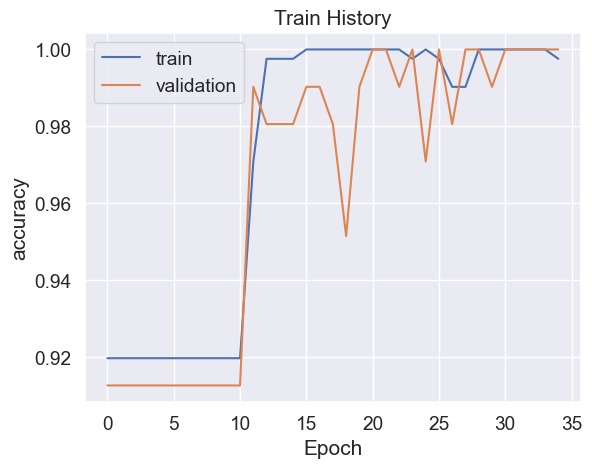

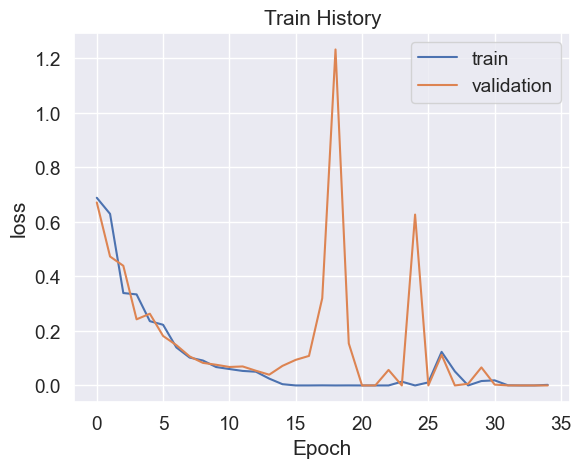

In [58]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

# Visualize the loss and accuracy after each epoch
show_train_history(train_history, 'accuracy', 'val_accuracy')
show_train_history(train_history, 'loss', 'val_loss')
